In [35]:
from S15lib.instruments import TimeStampTDC1
import matplotlib.pyplot as plt
import numpy as np

# Setup device, count singles

In [36]:
dev = TimeStampTDC1('COM3') # user your own device
dev.level = dev.TTL_LEVELS
print('Counts in channels: ', dev.get_counts(1))

C:\Users\rlawn\AppData\Local\Temp\ipykernel_24976\2912350395.py:1: DeprecationWarning: Deprecating 'TimeStampTDC1', please migrate to the renamed class 'TimestampTDC1'.
  dev = TimeStampTDC1('COM3') # user your own device


SerialException: could not open port 'COM3': PermissionError(13, '액세스가 거부되었습니다.', None, 5)

# Event time correlations

(0.0, 100.0)

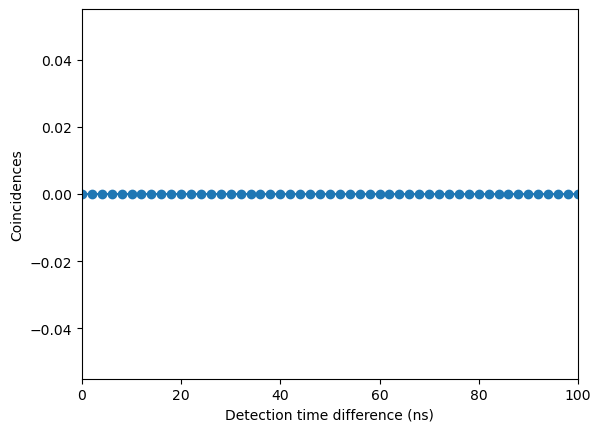

In [31]:
dev.level = dev.TTL_LEVELS
info = dev.count_g2(2)

plt.figure()
plt.plot(info['time_bins'], info['histogram'], 'o-')
plt.xlabel('Detection time difference (ns)')
plt.ylabel('Coincidences')
plt.xlim(0, 100)


# Get timestamps

In [32]:
acq_time = 1
cmd = '*RST;' + 'NIM;' + 'time ' + str(acq_time * 1000) + ';timestamp;counts?'
buffer = dev._com._stream_response_into_buffer(cmd, acq_time + 0.1)
bytes_hex = buffer[::-1].hex()

ts_word_list = [int(bytes_hex[i:i + 8], 16) for i in range(0, len(bytes_hex), 8)][::-1]

ts_list = []
pattern_list = []
periode_count = 0
periode_duration = 1<<27
prev_ts = -1
for ts_word in ts_word_list:
    time_stamp = (ts_word) >> 5
    pattern = ts_word & 0x1f
#     print(bin(ts_word), bin(pattern))
    print(time_stamp, bin(pattern))

    if prev_ts != -1 and time_stamp < prev_ts: #or ((prev_pattern & 0x10) == 0 and time_stamp == 67112824)):
            periode_count +=1
            print(periode_count)
    prev_ts = time_stamp
#     prev_pattern = pattern
    if pattern & 0x10 == 0:
        ts_list.append(time_stamp + periode_duration * periode_count)
        pattern_list.append(pattern)

# ts_list = list(map(lambda x: x*2, ts_list))
ts_list = np.array(ts_list) * 2
print(ts_list * 1e-9, pattern_list)

AttributeError: 'Serial' object has no attribute '_stream_response_into_buffer'

In [ ]:
dev._com.write(b'timestamp')

In [ ]:
len('0b10000000000000011110111100010001')

In [ ]:
format(((67112824 << 5) + 0x11), 'x')

In [ ]:
48845117 < 67112824

In [40]:
print('Counts in channels: ', dev.get_counts(1))

Counts in channels:  (0, 0, 0, 0)


In [42]:
exit()